# Mini-projet &ndash; Iris de Fisher&ndash; Fiche professeur

## Sommaire<a id="sommaire"></a>
[**Objectifs**](#objectifs)    
[**1. Manipuler des fichiers CSV à l'aide du module ``csv``**](#manipuler-fichiers-csv)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Lire un fichier CSV &ndash; Un exemple](#lire-fichier-csv)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Écrire dans un fichier CSV &ndash; Un exemple](#ecrire-fichier-csv)    
[**2. Compléments sur les tris**](#complements-sur-les-tris)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Rappels sur les fonctions ``sorted`` et ``sort``](#rappels-sorted-sort)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Fonctions anonymes/lambda](#fonctions-lambda)   
[**3. Le jeu de données *Iris de Fisher***](#jeu-de-donnees-iris)   
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Présentation du jeu de données](#presentation)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Un travail sur les données brutes](#travail-donnees-brutes)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Représentation graphique à l'aide de ``matplotlib``](#representation-matplotlib)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.4 Deux nouveaux iris &ndash; Conjectures](#nouveaux-iris-conjecture)    
[**4. Classification à l'aide de l'algorithme des $k$ plus proches voisins**](#classification-knn)   
&nbsp;&nbsp;&nbsp;&nbsp;[4.1 Fonction ``distance``](#fonction-distance)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.2 Trouver les $k$ plus proches voisins d'un nouvel iris](#trouver-kppv)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.3 Fonction ``occurrences_especes``](#fonction-occurrences_especes)    
&nbsp;&nbsp;&nbsp;&nbsp;[4.4 Déterminer l'espèce majoritaire](#determiner-espece-majoritaire)    
&nbsp;&nbsp;&nbsp;&nbsp;[4.5 Classification d'un nouvel iris](#classification-nouvel-iris)    
[**Licence**](#licence) 

## Objectifs<a id="objectifs"></a>

 [Retour au sommaire](#sommaire) 

En travaillant sur ce projet, les élèves ont l'occasion de réinvestir un nombre important de notions :
- les tableaux/listes en Python et les dictionnaires ;

![listes et dictionnaires](BO_tableaux_listes.png)
- le traitement de données en tables ;

![tables](BO_manipulation_donnees_en_tables.png)
- l'utilisation de bibliothèques ;

![bibliothèques](BO_bibliotheques.png)
- les tests ;

![tests](BO_tests.png)
- l'algorithme des $k$ plus proches voisins.

![algorithme KNN](BO_knn.png)

**Remarques. &ndash;** 
- Les élèves pourraient rencontrer de (petites) difficultés à utiliser les fonctions ``sorted`` et ``sort`` avec le paramètre optionnel ``key``.    
- Le projet fait écrire des tests aux élèves : il serait intéressant de les questionner sur le nombre de tests écrits (est-il suffisant ?)

**Prolongements possibles. &ndash;**
- Un devoir maison sur la prédiction de la langue d'origine d'un mot est prévu.
- Un autre projet pourra être proposé aux élèves : utiliser le jeu de données des survivants du naufrage du Titanic, disponible par exemple sur [Kaggle](https://www.kaggle.com/c/titanic).    

  Ce jeu de données étant incomplet, des manipulations sont nécessaires avant de pouvoir utiliser l'algorithme des $k$ plus proches voisins pour prédire si un passager donné aurait survécu.

## 1. Manipuler des fichiers CSV à l'aide du module ``csv``<a id="manipuler-fichiers-csv"></a>

Dans le projet &laquo; Harry Potter &raquo;, nous avons déjà travaillé avec des fichiers CSV. Le module ``csv`` de Python permet une manipulation plus aisée de ce type de fichiers.

 [Retour au sommaire](#sommaire) 

### 1.1 Lire un fichier CSV &ndash; Un exemple<a id="lire-fichier-csv"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice 1**    
Télécharger le fichier ``eleves_celebres.csv`` puis exécuter le code de la cellule ci-dessous.</font>

In [1]:
import csv

with open("eleves_celebres.csv", "r") as fichier:
    table = list(csv.DictReader(fichier))

table

[{'prénom': 'Brian',
  'jour': '1',
  'mois': '1',
  'année': '1942',
  'projet': 'programmer avec style',
  '': None},
 {'prénom': 'Grace',
  'jour': '9',
  'mois': '12',
  'année': '1906',
  'projet': 'production de code machine',
  '': None},
 {'prénom': 'Linus',
  'jour': '28',
  'mois': '12',
  'année': '1969',
  'projet': "un petit système d'exploitation",
  '': None},
 {'prénom': 'Donald',
  'jour': '10',
  'mois': '1',
  'année': '1938',
  'projet': 'tout sur les algorithmes',
  '': None},
 {'prénom': 'Alan',
  'jour': '23',
  'mois': '6',
  'année': '1912',
  'projet': 'déchiffrer des codes secrets',
  '': None},
 {'prénom': 'Blaise',
  'jour': '19',
  'mois': '6',
  'année': '1623',
  'projet': 'machine arithmétique',
  '': None},
 {'prénom': 'Margaret',
  'jour': '17',
  'mois': '8',
  'année': '1936',
  'projet': "atterrissage d'un module lunaire",
  '': None},
 {'prénom': 'Alan',
  'jour': '1',
  'mois': '4',
  'année': '1922',
  'projet': "ce qu'un programmeur doit savoir

Après avoir importé le module ``csv``, on ouvre le fichier ``eleves_celebres.csv``. La fonction ``DictReader`` du module ``csv`` renvoie une valeur spéciale qui peut être convertie en liste Python grâce à la fonction ``list``.    

On obtient alors <font style="color:red">une liste de dictionnaires</font> ordonnés Python dont les clés sont obtenues grâce à la première ligne du fichier CSV.    

*Remarque. &ndash; En Python, un dictionnaire ordonné est un dictionnaire particulier qui &laquo; stocke &raquo; un ordre particulier pour ses clés. Dans cette fiche, nous utiliserons les dictionnaires ordonnés comme des dictionnaires &laquo; classiques &raquo;.*

<font style="color:rgb(113,65,224)">**Exercice 2**   
Écrire une fonction ``ouvrir_csv`` qui prend en paramètre une chaîne de caractères (le nom d'un fichier CSV) et qui renvoie les données de ce fichier sous forme d'une liste de dictionnaires.</font>

In [2]:
# À vous de jouer !
def ouvrir_csv(fichier):
    with open (fichier, "r") as f:
        table = list(csv.DictReader(f))
    return table

### 1.2 Écrire dans un fichier CSV &ndash; Un exemple<a id="ecrire-fichier-csv"></a>

 [Retour au sommaire](#sommaire) 

On dispose de la liste de Pokémons ci-dessous (il s'agit d'une liste de dictionnaires).

In [3]:
pokemons = [{'#': '1',
  'Name': 'Bulbasaur',
  'Type 1': 'Grass',
  'Type 2': 'Poison',
  'Total': '318',
  'HP': '45',
  'Attack': '49',
  'Defense': '49',
  'Sp. Atk': '65',
  'Sp. Def': '65',
  'Speed': '45',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '2',
  'Name': 'Ivysaur',
  'Type 1': 'Grass',
  'Type 2': 'Poison',
  'Total': '405',
  'HP': '60',
  'Attack': '62',
  'Defense': '63',
  'Sp. Atk': '80',
  'Sp. Def': '80',
  'Speed': '60',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '3',
  'Name': 'Venusaur',
  'Type 1': 'Grass',
  'Type 2': 'Poison',
  'Total': '525',
  'HP': '80',
  'Attack': '82',
  'Defense': '83',
  'Sp. Atk': '100',
  'Sp. Def': '100',
  'Speed': '80',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '3',
  'Name': 'VenusaurMega Venusaur',
  'Type 1': 'Grass',
  'Type 2': 'Poison',
  'Total': '625',
  'HP': '80',
  'Attack': '100',
  'Defense': '123',
  'Sp. Atk': '122',
  'Sp. Def': '120',
  'Speed': '80',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '4',
  'Name': 'Charmander',
  'Type 1': 'Fire',
  'Type 2': '',
  'Total': '309',
  'HP': '39',
  'Attack': '52',
  'Defense': '43',
  'Sp. Atk': '60',
  'Sp. Def': '50',
  'Speed': '65',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '5',
  'Name': 'Charmeleon',
  'Type 1': 'Fire',
  'Type 2': '',
  'Total': '405',
  'HP': '58',
  'Attack': '64',
  'Defense': '58',
  'Sp. Atk': '80',
  'Sp. Def': '65',
  'Speed': '80',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '6',
  'Name': 'Charizard',
  'Type 1': 'Fire',
  'Type 2': 'Flying',
  'Total': '534',
  'HP': '78',
  'Attack': '84',
  'Defense': '78',
  'Sp. Atk': '109',
  'Sp. Def': '85',
  'Speed': '100',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '6',
  'Name': 'CharizardMega Charizard X',
  'Type 1': 'Fire',
  'Type 2': 'Dragon',
  'Total': '634',
  'HP': '78',
  'Attack': '130',
  'Defense': '111',
  'Sp. Atk': '130',
  'Sp. Def': '85',
  'Speed': '100',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '6',
  'Name': 'CharizardMega Charizard Y',
  'Type 1': 'Fire',
  'Type 2': 'Flying',
  'Total': '634',
  'HP': '78',
  'Attack': '104',
  'Defense': '78',
  'Sp. Atk': '159',
  'Sp. Def': '115',
  'Speed': '100',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '7',
  'Name': 'Squirtle',
  'Type 1': 'Water',
  'Type 2': '',
  'Total': '314',
  'HP': '44',
  'Attack': '48',
  'Defense': '65',
  'Sp. Atk': '50',
  'Sp. Def': '64',
  'Speed': '43',
  'Generation': '1',
  'Legendary': 'False'}]

Pour générer un fichier CSV contenant les informations précédentes, on utilise le module ``csv`` de la façon suivante :

In [4]:
with open("pokemons.csv", "w") as sortie:
    w = csv.DictWriter(sortie, ['#', 'Name', 'Type 1', 'Type 2', 'Total', 
                                'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 
                                'Speed', 'Generation', 'Legendary'])
    w.writeheader()
    w.writerows(pokemons)

Pour utiliser la fonction ``DictWriter``, il faut préciser la liste des attributs en paramètre. La fonction ``writeheader`` permet alors d'écrire la première ligne du fichier CSV, et ``writerows(pokemons)`` permet d'écrire le reste du fichier CSV.

*Remarque. &ndash; Si le fichier ``pokemons.csv`` existe déjà, il est écrasé, sinon il est créé.*

<font style="color:rgb(113,65,224)">**Exercice 3**    
Après avoir exécuté le code précédent, ouvrir le fichier ``pokemons.csv`` généré à l'aide d'un éditeur de textes ou de code.
</font>

<font style="color:rgb(113,65,224)">**Exercice 4**    
Écrire une fonction ``ecrire_csv`` qui prend en paramètres :
  - une chaîne de caractères ``fichier_sortie`` (le nom du fichier CSV de sortie) ;
  - une liste d'attributs ``attributs`` (pour la première ligne du fichier CSV de sortie);
  - une liste de dictionnaires ``donnees``,
et qui écrit dans le fichier CSV les données présentes dans la liste ``donnees``.</font>

In [5]:
# À vous de jouer !
def ecrire_csv(fichier_sortie, attributs, donnees):
    with open(fichier_sortie, "w") as sortie:
        w = csv.DictWriter(sortie, attributs)
        w.writeheader()
        w.writerows(donnees)

## 2. Compléments sur les tris<a id="complements-sur-les-tris"></a>

 [Retour au sommaire](#sommaire) 

### 2.1 Rappels sur les fonctions ``sorted`` et ``sort``<a id="rappels-sorted-sort"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice 5**    
1. À quoi servent les fonctions ``sorted`` et ``sort`` ?
2. Quelle différence importante y a-t-il entre ces deux fonctions ?</font>

*Répondre dans cette cellule*

### 2.2 Fonctions anonymes/lambda<a id="fonctions-lambda"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice 6**    
1. Essayer le code de la cellule ci-dessous :</font>

In [6]:
suivant = lambda n: n + 1
suivant(10)

11

<font style="color:rgb(113,65,224)">2. Qu'a-t-on défini ?</font>

*Répondre dans cette cellule*

<font style="color:rgb(113,65,224)">3. De quelle autre manière aurait-on pu définir la fonction ``suivant`` ?</font>

*Répondre dans cette cellule*

<font style="color:rgb(113,65,224)">**Exercice 7**    
On souhaite trier la liste ``pokemons`` du Pokémon le plus lent au Pokémon le plus rapide. Python permet de réaliser cette opération très facilement.    
1. Écrire une fonction qui prend un dictionnaire (représentant un Pokémon) en paramètre et qui renvoie la vitesse de celui-ci (un entier). On utilisera la syntaxe vue dans l'exercice précédent (fonction lambda).</font>

In [7]:
# À vous de jouer !
lambda pokemon: int(pokemon['Speed'])

<function __main__.<lambda>(pokemon)>

<font style="color:rgb(113,65,224)">2. Il suffit alors d'utiliser la fonction ``sorted`` (ou la fonction ``sort``) avec un paramètre optionnel égal à la fonction définie précédemment :</font>

```python
sorted(pokemon, key=<écrire la fonction lambda ici>)
```

  <font style="color:rgb(113,65,224)">Essayer dans la cellule ci-dessous.</font>

In [8]:
# À vous de jouer !
sorted(pokemons, key=lambda pokemon: int(pokemon['Speed']))

[{'#': '7',
  'Name': 'Squirtle',
  'Type 1': 'Water',
  'Type 2': '',
  'Total': '314',
  'HP': '44',
  'Attack': '48',
  'Defense': '65',
  'Sp. Atk': '50',
  'Sp. Def': '64',
  'Speed': '43',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '1',
  'Name': 'Bulbasaur',
  'Type 1': 'Grass',
  'Type 2': 'Poison',
  'Total': '318',
  'HP': '45',
  'Attack': '49',
  'Defense': '49',
  'Sp. Atk': '65',
  'Sp. Def': '65',
  'Speed': '45',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '2',
  'Name': 'Ivysaur',
  'Type 1': 'Grass',
  'Type 2': 'Poison',
  'Total': '405',
  'HP': '60',
  'Attack': '62',
  'Defense': '63',
  'Sp. Atk': '80',
  'Sp. Def': '80',
  'Speed': '60',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '4',
  'Name': 'Charmander',
  'Type 1': 'Fire',
  'Type 2': '',
  'Total': '309',
  'HP': '39',
  'Attack': '52',
  'Defense': '43',
  'Sp. Atk': '60',
  'Sp. Def': '50',
  'Speed': '65',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '3',
  'Name': '

<font style="color:rgb(113,65,224)">3. De la même manière, trier la liste ``pokemons`` du Pokémon le plus faible au Pokémon le plus fort.</font>

In [9]:
# À vous de jouer !
sorted(pokemons, key=lambda pokemon: int(pokemon['HP']))

[{'#': '4',
  'Name': 'Charmander',
  'Type 1': 'Fire',
  'Type 2': '',
  'Total': '309',
  'HP': '39',
  'Attack': '52',
  'Defense': '43',
  'Sp. Atk': '60',
  'Sp. Def': '50',
  'Speed': '65',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '7',
  'Name': 'Squirtle',
  'Type 1': 'Water',
  'Type 2': '',
  'Total': '314',
  'HP': '44',
  'Attack': '48',
  'Defense': '65',
  'Sp. Atk': '50',
  'Sp. Def': '64',
  'Speed': '43',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '1',
  'Name': 'Bulbasaur',
  'Type 1': 'Grass',
  'Type 2': 'Poison',
  'Total': '318',
  'HP': '45',
  'Attack': '49',
  'Defense': '49',
  'Sp. Atk': '65',
  'Sp. Def': '65',
  'Speed': '45',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '5',
  'Name': 'Charmeleon',
  'Type 1': 'Fire',
  'Type 2': '',
  'Total': '405',
  'HP': '58',
  'Attack': '64',
  'Defense': '58',
  'Sp. Atk': '80',
  'Sp. Def': '65',
  'Speed': '80',
  'Generation': '1',
  'Legendary': 'False'},
 {'#': '2',
  'Name': 'Ivys

## 3. Le jeu de données *Iris de Fisher*<a id="jeu-de-donnees-iris"></a>

 [Retour au sommaire](#sommaire) 

### 3.1 Présentation du jeu de données<a id="presentation"></a>

 [Retour au sommaire](#sommaire) 

Ce jeu de données, connu aussi sous le nom de ***Iris de Fisher***, a été présenté par Ronald Fisher en 1936 dans l'article *The use of multiple measurements in taxonomic problems.*

Le jeu de données comprend 150 échantillons de chacune des trois espèces d'iris : Iris setosa, Iris virginica et Iris versicolor. Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales, la longueur et la largeur des pétales, en centimètres.

![Image des iris](iris_resized.png)

### 3.2 Un travail sur les données brutes<a id="travail-donnees-brutes"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice 8**
1. Télécharger le fichier ``iris_data_set.csv`` puis afficher les caractéristiques des 5 premiers échantillons à l'aide de la fonction ``ouvrir_csv`` et une liste par compréhension.</font>

In [10]:
# À vous de jouer !
echantillons = ouvrir_csv("iris_data_set.csv")
[echantillons[i] for i in range(5)]

[{'sepal_length': '5.1',
  'sepal_width': '3.5',
  'petal_length': '1.4',
  'petal_width': '0.2',
  'species': 'setosa'},
 {'sepal_length': '4.9',
  'sepal_width': '3.0',
  'petal_length': '1.4',
  'petal_width': '0.2',
  'species': 'setosa'},
 {'sepal_length': '4.7',
  'sepal_width': '3.2',
  'petal_length': '1.3',
  'petal_width': '0.2',
  'species': 'setosa'},
 {'sepal_length': '4.6',
  'sepal_width': '3.1',
  'petal_length': '1.5',
  'petal_width': '0.2',
  'species': 'setosa'},
 {'sepal_length': '5.0',
  'sepal_width': '3.6',
  'petal_length': '1.4',
  'petal_width': '0.2',
  'species': 'setosa'}]

<font style="color:rgb(113,65,224)">2. Afin de simplifier, nous allons travailler uniquement sur la longueur et la largeur des pétales. Créer un fichier ``iris_data_set_petals.csv`` obtenu en supprimant la longueur et la largeur des sépales. On remplacera également ``petal_length``, ``petal_width`` et ``species`` par ``longueur_petales``, ``largeur_petales`` et ``espece``.</font>

In [11]:
# À vous de jouer !
echantillons = ouvrir_csv("iris_data_set.csv")
echantillons_sans_sepales = [
    {'longueur_petales': iris['petal_length'],
     'largeur_petales': iris['petal_width'],
     'espece': iris['species']
    }
    for iris in echantillons
]
ecrire_csv("iris_data_set_petals.csv", 
           ['longueur_petales', 'largeur_petales', 'espece'],
           echantillons_sans_sepales
          )

<font style="color:rgb(113,65,224)">3. Vérifier que le résultat semble correct, en utilisant par exemple la fonction ``ouvrir_csv``.</font>

In [12]:
# À vous de jouer!
ouvrir_csv("iris_data_set_petals.csv")

[{'longueur_petales': '1.4', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.4', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.3', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.5', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.4', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.7', 'largeur_petales': '0.4', 'espece': 'setosa'},
 {'longueur_petales': '1.4', 'largeur_petales': '0.3', 'espece': 'setosa'},
 {'longueur_petales': '1.5', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.4', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.5', 'largeur_petales': '0.1', 'espece': 'setosa'},
 {'longueur_petales': '1.5', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.6', 'largeur_petales': '0.2', 'espece': 'setosa'},
 {'longueur_petales': '1.4', 'largeur_petales': '0.1', 'espece': 'setosa'},
 {'longueur_

### 3.3 Représentation graphique à l'aide de ``matplotlib``<a id="representation-matplotlib"></a>

 [Retour au sommaire](#sommaire) 

La bibliothèque ``matplotlib`` permet de représenter les données du fichier précédent (``iris_data_set_petals.csv``).

<font style="color:rgb(113,65,224)">**Exercice 9**    
Compléter le code suivant pour que les échantillons d'Iris Virginica soient aussi représentés sur le graphique, par des croix en forme de signe ``+``.

*Aide. &ndash; Quelques options de ``plt.scatter`` se trouvent [ici](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) et [là](https://matplotlib.org/stable/api/colors_api.html).*</font>

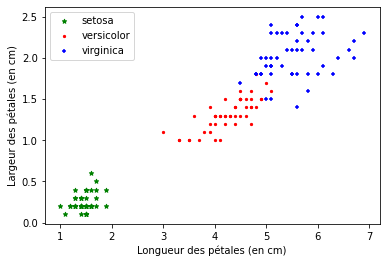

In [13]:
import matplotlib.pyplot as plt
echantillons_sans_sepales = ouvrir_csv("iris_data_set_petals.csv")

X_setosa = [float(iris['longueur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='setosa'
           ]
Y_setosa = [float(iris['largeur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='setosa'
           ]
X_versicolor = [float(iris['longueur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='versicolor'
           ]
Y_versicolor = [float(iris['largeur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='versicolor'
           ]
X_virginica = [float(iris['longueur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='virginica'
           ]
Y_virginica = [float(iris['largeur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='virginica'
           ]
plt.scatter(X_setosa, Y_setosa, color='g', label='setosa', 
            s = 20, marker = '*')
plt.scatter(X_versicolor, Y_versicolor, color='r', label='versicolor',
            s = 20, marker = '.')
plt.scatter(X_virginica, Y_virginica, color='b', label='virginica', 
            s = 20, marker = '+')
plt.legend()
# étiquettes des axes
plt.xlabel('Longueur des pétales (en cm)')
plt.ylabel('Largeur des pétales (en cm)')
# affichage du graphique
plt.show()

### 3.4 Deux nouveaux iris : conjectures<a id="nouveaux-iris-conjecture"></a>

 [Retour au sommaire](#sommaire) 

On se demande à quelle espèce appartiennent les deux iris suivants :

|        | Longueur des pétales (en cm) | Largeur des pétales (en cm) |
|:------:|:----------------------------:|:---------------------------:|
| Iris 1 |               2              |             0,5             |
| Iris 2 |              2,5             |             0,75            |

<font style="color:rgb(113,65,224)">**Exercice 10**    
En utilisant ``plt.scatter``, représenter ces deux iris sur le graphique précédent, l'iris 1 par un triangle jaune avec la pointe vers le bas, l'iris 2 par un triangle mauve avec la pointe vers le haut.</font>

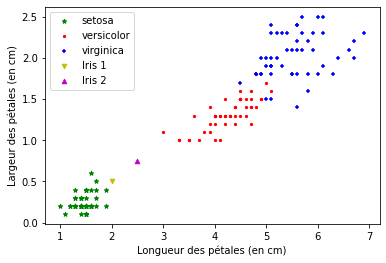

In [14]:
# À vous de jouer !
import matplotlib.pyplot as plt
echantillons_sans_sepales = ouvrir_csv("iris_data_set_petals.csv")

X_setosa = [float(iris['longueur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='setosa'
           ]
Y_setosa = [float(iris['largeur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='setosa'
           ]
X_versicolor = [float(iris['longueur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='versicolor'
           ]
Y_versicolor = [float(iris['largeur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='versicolor'
           ]
X_virginica = [float(iris['longueur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='virginica'
           ]
Y_virginica = [float(iris['largeur_petales']) 
            for iris in echantillons_sans_sepales
            if iris['espece']=='virginica'
           ]
plt.scatter(X_setosa, Y_setosa, color='g', label='setosa', 
            s = 20, marker = '*')
plt.scatter(X_versicolor, Y_versicolor, color='r', label='versicolor',
            s = 20, marker = '.')
plt.scatter(X_virginica, Y_virginica, color='b', label='virginica', 
            s = 20, marker = '+')
plt.scatter(2, 0.5, s=20, color='y', marker = 'v', label='Iris 1')
plt.scatter(2.5, 0.75, s=20, color='m', marker = '^', label='Iris 2')
plt.legend()
# étiquettes des axes
plt.xlabel('Longueur des pétales (en cm)')
plt.ylabel('Largeur des pétales (en cm)')
plt.show()

## 4. Classification à l'aide de l'algorithme des $k$ plus proches voisins<a id="classification-knn"></a>

 [Retour au sommaire](#sommaire) 

### 4.1 Fonction ``distance``<a id="fonction-distance"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice 11**   
Écrire une fonction ``distance`` qui prend en paramètres :
- ``longueur_A`` et ``largeur_A`` : la longueur et la largeur des pétales d'un premier iris ;
- ``longueur_B`` et ``largeur_B`` : la longueur et la largeur des pétales d'un second iris,

et qui renvoie la distance entre les deux iris donnée par :


$\sqrt{(\text{longueur_A}-\text{longueur_B})^2+(\text{largeur_A}-\text{largeur_B})^2}$.</font>

In [15]:
# À vous de jouer !
from math import sqrt


def distance(longueur_A, largeur_A, longueur_B, largeur_B):
    return sqrt((longueur_A - longueur_B) ** 2 +
                (largeur_A - largeur_B) ** 2
    )

### 4.2 Trouver les $k$ plus proches voisins d'un nouvel iris<a id="trouver-kppv"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice 12**    
Écrire une fonction ``kppv`` qui prend en paramètres :
- une liste ``echantillons`` d'iris (de dictionnaires ayant trois clés : la longueur et la largeur des pétales, l'espèce) ;
- un entier naturel non nul ``k`` ;
- la longueur ``longueur`` et la largeur ``largeur`` d'un nouvel iris,

et qui renvoie les $k$ plus proches voisins de ce nouvel iris.</font>

In [16]:
# À vous de jouer !
def kppv(echantillons, k, longueur, largeur):
    # on rajoute à chaque iris (dictionnaire) de la liste echantillons
    # la distance (nouvelle clé) avec le nouvel iris à classer
    echantillons_avec_distance = [
        {'longueur_petales': iris['longueur_petales'],
         'largeur_petales': iris['largeur_petales'],
         'espece': iris['espece'],
         'distance': distance(float(iris['longueur_petales']),
                              float(iris['largeur_petales']),
                              longueur, largeur
                             )
        }
        for iris in echantillons
    ]
    # on trie cette liste d'iris par distances croissantes
    echantillons_avec_distance.sort(key=lambda iris:iris['distance'])
    return echantillons_avec_distance[:k]

In [17]:
# Un test pour vérifier votre travail
echantillons = ouvrir_csv('iris_data_set_petals.csv')
assert kppv(echantillons, 5, 2, 0.5) == [
     {'longueur_petales': '1.9',
      'largeur_petales': '0.4',
      'espece': 'setosa',
      'distance': 0.14142135623730953},
     {'longueur_petales': '1.7',
      'largeur_petales': '0.5',
      'espece': 'setosa',
      'distance': 0.30000000000000004},
     {'longueur_petales': '1.7',
      'largeur_petales': '0.4',
      'espece': 'setosa',
      'distance': 0.31622776601683794},
     {'longueur_petales': '1.9',
      'largeur_petales': '0.2',
      'espece': 'setosa',
      'distance': 0.31622776601683794},
     {'longueur_petales': '1.7',
      'largeur_petales': '0.3',
      'espece': 'setosa',
      'distance': 0.36055512754639896}
]

### 4.3 Fonction ``occurrences_especes``<a id="fonction-occurrences_especes"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice 13**    
On souhaite écrire une fonction ``occurrences_especes`` qui prend en paramètre une liste d'iris ``echantillons`` et qui renvoie un dictionnaire dont les clés sont les trois espèces et les valeurs le nombre d'iris de chaque espèce.
1. Sachant que le jeu de données contient $50$ Iris Setosa, $50$ Iris Versicolor et $50$ Iris Virginica, compléter le test de la fonction ``occurrences_especes``.
2. Écrire alors la fonction ``occurrences_especes``, puis utiliser le test écrit précédemment.</font>

In [18]:
# À vous de jouer !
def occurrences_especes(echantillons):
    occurrences = {'setosa': 0, 'versicolor': 0, 'virginica': 0}
    for iris in echantillons:
        espece = iris['espece']
        occurrences[espece] += 1
    return occurrences

In [19]:
# Un test à compléter
echantillons = ouvrir_csv('iris_data_set_petals.csv')
assert occurrences_especes(echantillons) == {'setosa': 50, 
                                             'versicolor': 50, 
                                             'virginica': 50}

### 4.4 Déterminer l'espèce majoritaire<a id="determiner-espece-majoritaire"></a>

<font style="color:rgb(113,65,224)">**Exercice 14**    
On souhaite écrire une fonction ``espece_majoritaire`` qui prend en paramètre une liste d'iris ``echantillons`` et qui renvoie l'espèce majoritaire de cette liste.
1. Compléter le test de la fonction ``espece_majoritaire``.
2. Écrire la fonction ``espece_majoritaire``, puis utiliser le test écrit précédemment.</font>

In [20]:
# À vous de jouer !
def espece_majoritaire(echantillons):
    # on récupère le dictionnaire donnant les occurrences de chaque espèce
    occurrences = occurrences_especes(echantillons)
    # on déterminer l'espèce majoritaire
    espece_majoritaire = 'setosa'
    nombre = occurrences['setosa']
    if occurrences['versicolor'] > nombre:
        espece_majoritaire = 'versicolor'
        nombre = occurrences['versicolor']
    if occurrences['virginica'] > nombre:
        espece_majoritaire = 'virginica'
        nombre = occurrences['virginica']
    return espece_majoritaire

In [21]:
# Un test à compléter
echantillons = [{'longueur_petales': '1.4', 'largeur_petales': '0.2', 'espece': 'setosa'},
                {'longueur_petales': '1.4', 'largeur_petales': '0.2', 'espece': 'setosa'},
                {'longueur_petales': '1.3', 'largeur_petales': '0.2', 'espece': 'setosa'},
                {'longueur_petales': '1.6', 'largeur_petales': '0.6', 'espece': 'setosa'},
                {'longueur_petales': '1.9', 'largeur_petales': '0.4', 'espece': 'setosa'},
                {'longueur_petales': '1.4', 'largeur_petales': '0.3', 'espece': 'setosa'},
                {'longueur_petales': '3.5', 'largeur_petales': '1.0', 'espece': 'versicolor'},
                {'longueur_petales': '3.8', 'largeur_petales': '1.1', 'espece': 'versicolor'},
                {'longueur_petales': '3.7', 'largeur_petales': '1.0', 'espece': 'versicolor'},
                {'longueur_petales': '3.9', 'largeur_petales': '1.2', 'espece': 'versicolor'},
                {'longueur_petales': '5.2', 'largeur_petales': '2.3', 'espece': 'virginica'},
                {'longueur_petales': '5.0', 'largeur_petales': '1.9', 'espece': 'virginica'},
                {'longueur_petales': '5.2', 'largeur_petales': '2.0', 'espece': 'virginica'},
                {'longueur_petales': '5.4', 'largeur_petales': '2.3', 'espece': 'virginica'},
                {'longueur_petales': '5.1', 'largeur_petales': '1.8', 'espece': 'virginica'}
               ]
assert espece_majoritaire(echantillons) == 'setosa'

### 4.5 Classification d'un nouvel iris<a id="classification-nouvel-iris"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice 15**    
Écrire une fonction ``classification`` qui prend en paramètres :
- une liste d'iris ``echantillons`` (de dictionnaires ayant trois clés : la longueur et la largeur des pétales, l'espèce) ;
- un entier naturel non nul ``k`` ;
- la longueur ``longueur`` et la largeur ``largeur`` d'un nouvel iris,

et qui renvoie l'espèce majoritaire parmi les $k$ plus proches voisins du nouvel iris.</font>

In [22]:
# À vous de jouer !
def classification(echantillons, k, longueur, largeur):
    # on détermine les k plus proches voisins
    voisins = kppv(echantillons, k, longueur, largeur)
    espece = espece_majoritaire(voisins)
    return espece

<font style="color:rgb(113,65,224)">**Exercice 16**    
Classer alors les iris 1 et 2 en utilisant $k=9$.</font>

In [23]:
# On classe l'iris 1
echantillons = ouvrir_csv("iris_data_set_petals.csv")
classification(echantillons, 9, 2, 0.5)

'setosa'

In [24]:
# On classe l'iris 2
classification(echantillons, 9, 2.5, 0.75)

'setosa'

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Ce(tte) œuvre est mise à disposition selon les termes de la <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licence Creative Commons Attribution - Pas d’Utilisation Commerciale - Partage dans les Mêmes Conditions 4.0 International</a>.<a id="licence"></a>